In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

# Stock y TARGET
Aquí se encuentra el target. Analizaremos diferencias entre set de train y de test. De aquí saldrá el primer modelo base.

In [4]:
# Reading dataset
df_stock_train = pd.read_csv("../data/DATA_STOCK_VARS_TRAIN_F.csv")
df_stock_test = pd.read_csv("../data/DATA_STOCK_VARS_TEST_F.csv")

In [3]:
df_stock_train.head().T

,0,1,2,3,4
ID,201808_48117,201808_87846,201808_89372,201804_87164,201804_13922
MES_T0,201808,201808,201808,201804,201804
ID_CLIENTE,48117,87846,89372,87164,13922
FUGA_3M,0,1,0,0,0
FH_NACIMIENTO,2015-12-04 00:00:00,1970-11-11 00:00:00,1985-01-23 00:00:00,2008-01-01 00:00:00,2016-08-11 00:00:00
FH_ALTA,2017-09-04 00:00:00,2007-08-14 00:00:00,2006-02-22 00:00:00,2008-06-12 00:00:00,2017-01-04 00:00:00
RGO_RIEGO_BBVA,1,1,1,1,1
RGO_RIESGO_SIST,8,13,5,17,15
RGO_SDO_MEDIO_ACTIVO,6,16,8,1,15
RGO_SDO_MEDIO_PASIVO,9,15,7,20,17


In [9]:
df_stock_train.info() # Enteros... pocos valores continuos en general en todos los datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73661 entries, 0 to 73660
Data columns (total 20 columns):
ID                      73661 non-null object
MES_T0                  73661 non-null int64
ID_CLIENTE              73661 non-null int64
FUGA_3M                 73661 non-null int64
FH_NACIMIENTO           72765 non-null object
FH_ALTA                 72852 non-null object
RGO_RIEGO_BBVA          73661 non-null int64
RGO_RIESGO_SIST         73661 non-null int64
RGO_SDO_MEDIO_ACTIVO    73661 non-null int64
RGO_SDO_MEDIO_PASIVO    73661 non-null int64
RGO_MARGEN_OPER_MES     73661 non-null int64
RGO_MARGEN_OPER_ACUM    73661 non-null int64
RGO_FACTURA_ANUAL       73661 non-null int64
TO_EMPLEADOS            72211 non-null float64
CD_SBS_NORMAL           51297 non-null float64
CD_SBS_CPP              51297 non-null float64
CD_SBS_DDP              51297 non-null float64
TP_VIVI                 72734 non-null object
TP_PERSONA              73661 non-null object
TIPO_NEGOCIO           

In [5]:
df_stock_train.shape

(73661, 20)

In [6]:
df_stock_test.shape

(26338, 20)

In [7]:
df_stock_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MES_T0,73661.0,201807.052986,2.582256,201803.0,201805.00,201807.0,201809.0,201811.00
ID_CLIENTE,73661.0,47394.093414,29003.402790,1.0,23564.00,43712.0,72122.0,99999.00
FUGA_3M,73661.0,0.133721,0.340354,0.0,0.00,0.0,0.0,1.00
RGO_RIEGO_BBVA,73661.0,10.482630,5.772145,1.0,5.00,10.0,15.0,20.00
RGO_RIESGO_SIST,73661.0,10.487707,5.768797,1.0,5.00,10.0,16.0,20.00
RGO_SDO_MEDIO_ACTIVO,73661.0,10.437776,5.786781,1.0,5.00,10.0,15.0,20.00
RGO_SDO_MEDIO_PASIVO,73661.0,10.482318,5.771627,1.0,5.00,10.0,15.0,20.00
RGO_MARGEN_OPER_MES,73661.0,10.488427,5.778695,1.0,5.00,10.0,15.0,20.00
RGO_MARGEN_OPER_ACUM,73661.0,10.559333,5.708147,1.0,6.00,11.0,15.0,20.00
RGO_FACTURA_ANUAL,73661.0,10.399723,5.795914,1.0,5.00,10.0,15.0,20.00


In [8]:
df_stock_test.describe().T

,count,mean,std,min,25%,50%,75%,max
MES_T0,26338.0,201872.224201,41.994893,201812.0,201812.00,201901.0,201902.00,201902.00
ID_CLIENTE,26338.0,57288.088883,27188.746346,394.0,28529.25,64161.5,77969.75,97214.00
FUGA_3M,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGO_RIEGO_BBVA,26338.0,10.548219,5.749604,1.0,6.00,11.0,16.00,20.00
RGO_RIESGO_SIST,26338.0,10.534019,5.759135,1.0,6.00,11.0,15.00,20.00
RGO_SDO_MEDIO_ACTIVO,26338.0,10.673665,5.704997,1.0,6.00,11.0,16.00,20.00
RGO_SDO_MEDIO_PASIVO,26338.0,10.549093,5.751050,1.0,6.00,11.0,16.00,20.00
RGO_MARGEN_OPER_MES,26338.0,10.532007,5.731330,1.0,6.00,11.0,16.00,20.00
RGO_MARGEN_OPER_ACUM,26338.0,10.333700,5.922709,1.0,5.00,10.0,16.00,20.00
RGO_FACTURA_ANUAL,26338.0,10.780090,5.673229,1.0,6.00,11.0,16.00,20.00


### Train y test se ven con una distribución similar.

In [12]:
# Duplicados? (No debería haber)

df_stock_train.sort_values(["MES_T0","ID_CLIENTE"], inplace = True)
bool_series = df_stock_train[["MES_T0","ID_CLIENTE"]].duplicated()
df_stock_train[bool_series] 

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,RGO_MARGEN_OPER_MES,RGO_MARGEN_OPER_ACUM,RGO_FACTURA_ANUAL,TO_EMPLEADOS,CD_SBS_NORMAL,CD_SBS_CPP,CD_SBS_DDP,TP_VIVI,TP_PERSONA,TIPO_NEGOCIO


In [13]:

df_stock_test.sort_values(["MES_T0","ID_CLIENTE"], inplace = True)
bool_series = df_stock_test[["MES_T0","ID_CLIENTE"]].duplicated()
df_stock_test[bool_series]

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,RGO_MARGEN_OPER_MES,RGO_MARGEN_OPER_ACUM,RGO_FACTURA_ANUAL,TO_EMPLEADOS,CD_SBS_NORMAL,CD_SBS_CPP,CD_SBS_DDP,TP_VIVI,TP_PERSONA,TIPO_NEGOCIO


In [25]:
#Por cliente?
df_stock_train.sort_values(["ID_CLIENTE"], inplace = True)
bool_series = df_stock_train[["ID_CLIENTE"]].duplicated()
df_stock_train[bool_series] 

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,RGO_MARGEN_OPER_MES,RGO_MARGEN_OPER_ACUM,RGO_FACTURA_ANUAL,TO_EMPLEADOS,CD_SBS_NORMAL,CD_SBS_CPP,CD_SBS_DDP,TP_VIVI,TP_PERSONA,TIPO_NEGOCIO


Sòlo un registro por cliente. Amazing.

# Distribución del target

In [14]:
df_stock_train.FUGA_3M.value_counts(dropna=False).sort_index()

0    63811
1     9850
Name: FUGA_3M, dtype: int64

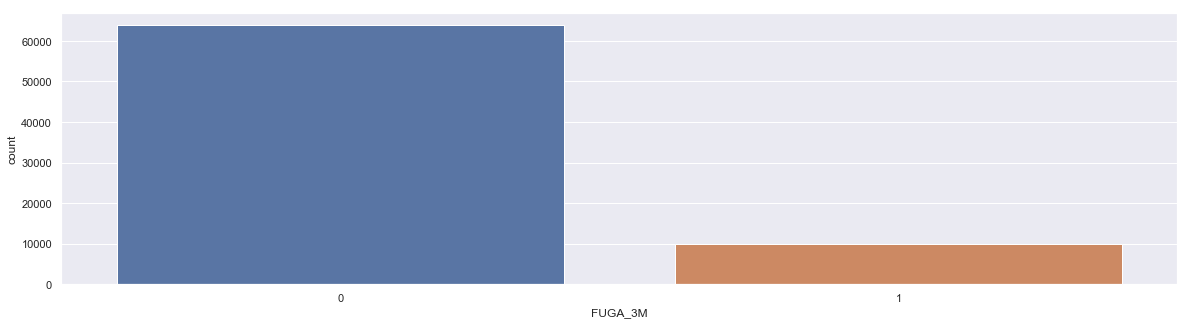

In [15]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train)

Tengo muchas preguntas xd a ver

# Distribución del target por periodo

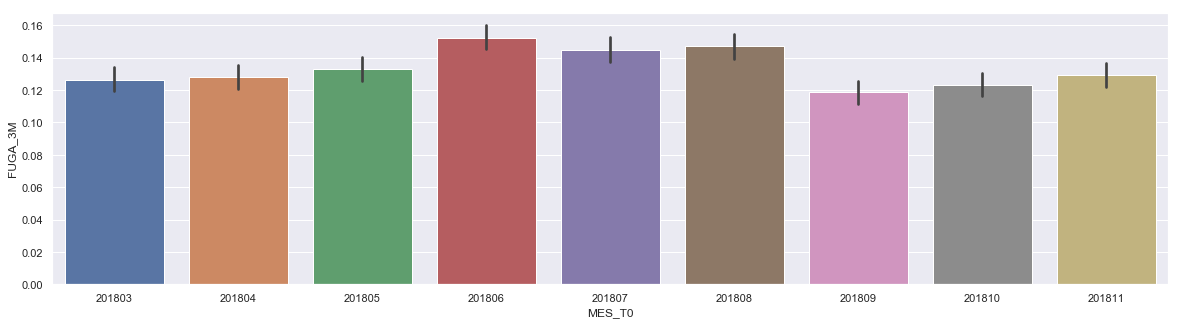

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='MES_T0', y='FUGA_3M', data=df_stock_train)

- Poca variación entre el porcentaje total de attrition por periodo (12-15%)
- Rangos elevados en la mitad de año. [ojo, periodos que serán evaluados son del fin de año]

# Solo se tiene un punto por cliente.

In [27]:
df_stock_train[(df_stock_train['MES_T0'] == 201803) & (df_stock_train['FUGA_3M'] == 1)].ID_CLIENTE.value_counts(dropna=False).sort_index() #7823 clientes

32       1
37       1
43       1
79       1
85       1
114      1
177      1
183      1
189      1
215      1
257      1
385      1
390      1
393      1
395      1
406      1
412      1
447      1
489      1
510      1
530      1
554      1
558      1
566      1
578      1
638      1
651      1
662      1
663      1
682      1
        ..
93916    1
93921    1
93935    1
93950    1
93986    1
93996    1
94001    1
94008    1
94021    1
94058    1
94148    1
94154    1
94161    1
94170    1
94179    1
94183    1
94216    1
94219    1
94243    1
94245    1
94246    1
94286    1
94301    1
94329    1
94342    1
94353    1
94366    1
94380    1
94414    1
94415    1
Name: ID_CLIENTE, Length: 989, dtype: int64

In [28]:
#Historia del cliente 32
df_stock_train[df_stock_train['ID_CLIENTE'] == 32]

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,RGO_MARGEN_OPER_MES,RGO_MARGEN_OPER_ACUM,RGO_FACTURA_ANUAL,TO_EMPLEADOS,CD_SBS_NORMAL,CD_SBS_CPP,CD_SBS_DDP,TP_VIVI,TP_PERSONA,TIPO_NEGOCIO
2923,201803_32,201803,32,1,1990-01-05 00:00:00,2017-10-24 00:00:00,1,2,10,3,1,1,11,0.0,100.0,0.0,0.0,HOGAR,F,PNN


A la hora de comparar con otros datasets, revisar que si hay informacion de estos clientes en abandono en pasados los 3 meses, ya que se podrian descubrir data leaks

# Correlación entre rangos

In [29]:
rang_cols = ['RGO_RIEGO_BBVA','RGO_RIESGO_SIST','RGO_SDO_MEDIO_ACTIVO',
             'RGO_SDO_MEDIO_PASIVO','RGO_MARGEN_OPER_MES','RGO_MARGEN_OPER_ACUM','RGO_FACTURA_ANUAL']

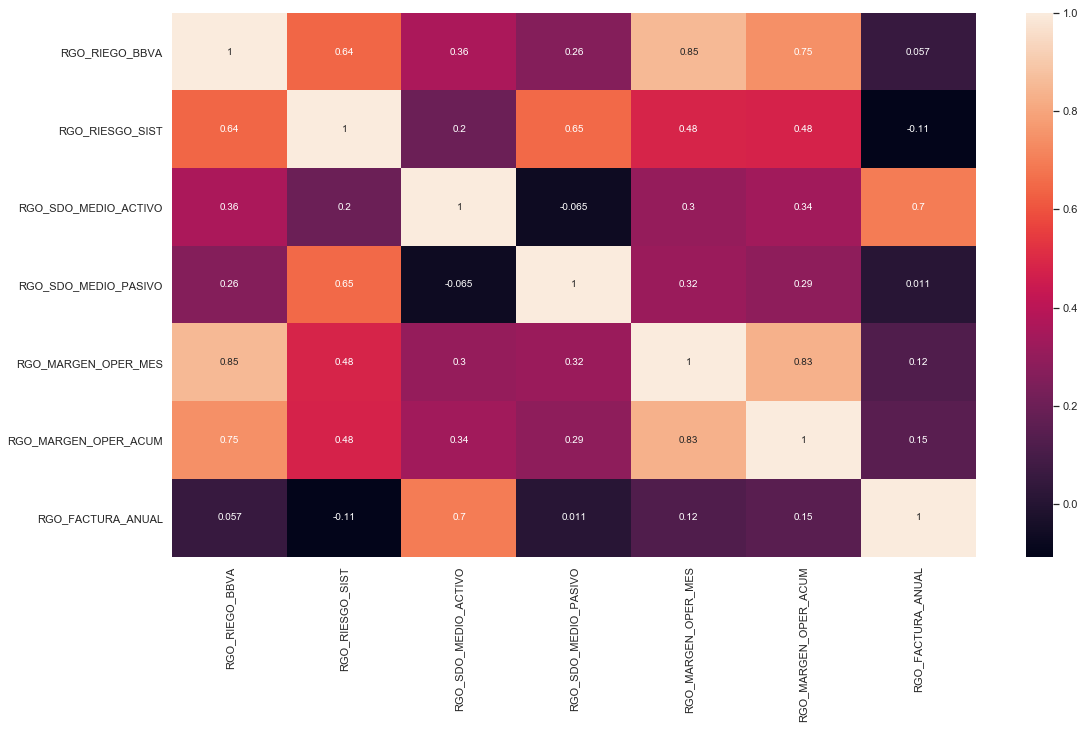

In [30]:
# Heatmap train
plt.figure(figsize=(18,10))
sns.heatmap(df_stock_train[rang_cols].corr(),annot=True)

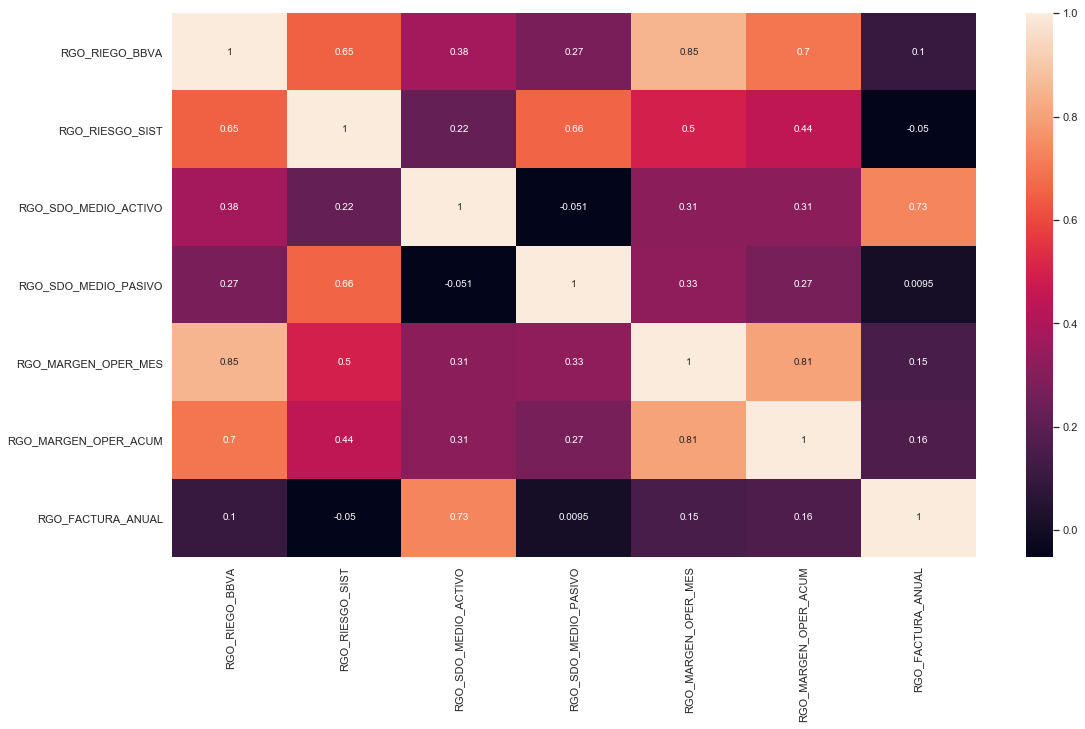

In [31]:
# Heatmap test
plt.figure(figsize=(18,10))
sns.heatmap(df_stock_test[rang_cols].corr(),annot=True)

### Hay correlaciones fuertes entre los rangos,como es de esperarse. Todos son en el tiempo N-1.

# Analisis por el total de empleados. (Deberia tener relación con el tipo de empresa)

In [32]:
#Train
df_stock_train.TO_EMPLEADOS.value_counts(dropna=False).sort_index() # Mayoria en 0

0.0         53422
1.0          6544
2.0          4857
3.0          2027
4.0           951
5.0          1531
6.0           445
7.0           175
8.0           250
9.0           106
10.0          627
11.0          118
12.0          174
13.0           33
14.0           32
15.0          187
16.0           42
17.0           29
18.0           40
19.0           14
20.0          128
21.0           18
22.0           18
23.0           18
24.0           12
25.0           40
26.0            8
27.0            2
28.0           11
29.0            5
            ...  
123703.0        1
124651.0        1
128772.0        1
130942.0        1
130953.0        1
134001.0        1
137319.0        1
140568.0        1
150121.0        1
150122.0        1
206018.0        1
206029.0        1
347608.0        2
392996.0        1
406336.0        1
436884.0        1
467099.0        1
471520.0        1
546921.0        1
601207.0        1
653892.0        1
660335.0        1
698197.0        2
703105.0        1
709674.0  

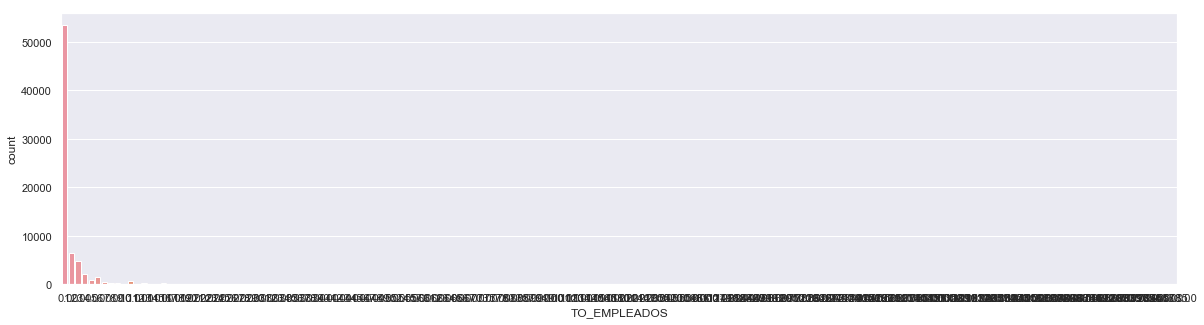

In [34]:
#Train
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'TO_EMPLEADOS', data = df_stock_train) # flags por intervalos? analizar cuales son las empresas que tienen 0

In [35]:
#Test
df_stock_test.TO_EMPLEADOS.value_counts(dropna=False).sort_index() 

0.0         19266
1.0          2304
2.0          1698
3.0           698
4.0           366
5.0           546
6.0           148
7.0            68
8.0            92
9.0            35
10.0          237
11.0           39
12.0           53
13.0           12
14.0           14
15.0           67
16.0           16
17.0           11
18.0            9
19.0            4
20.0           38
21.0            2
22.0            5
23.0            8
24.0            8
25.0           11
26.0            3
27.0            4
28.0            5
29.0            1
            ...  
3566.0          1
4530.0          1
4641.0          1
4741.0          1
4923.0          1
6205.0          1
7110.0          1
7229.0          1
7547.0          1
9609.0          2
30000.0         1
30091.0         1
35465.0         1
40143.0         1
42019.0         1
51906.0         1
60230.0         1
64207.0         1
102779.0        1
111205.0        1
128772.0        1
134001.0        1
136333.0        1
222437.0        1
422513.0  

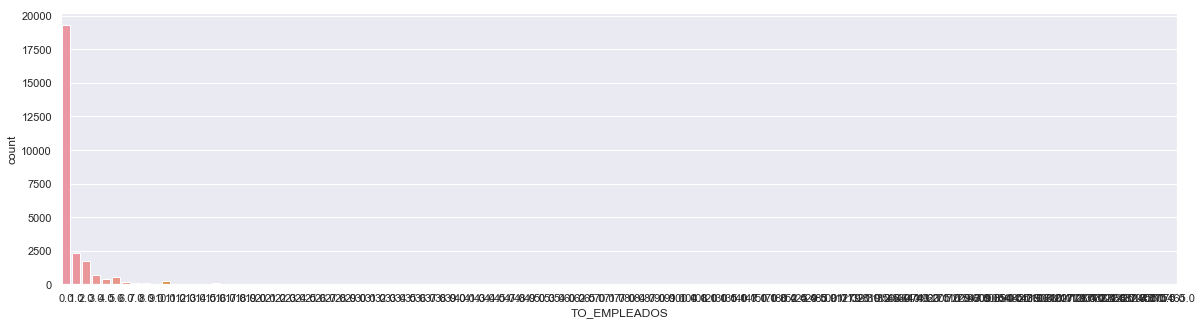

In [36]:
#Test
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'TO_EMPLEADOS', data = df_stock_test) # Esperaria que gran mayoria sea pymes

### Revisar a que negocio pertenecen aquellos que tienen 0 empleados y nulos

In [5]:

df_stock_train[df_stock_train['TO_EMPLEADOS'] == 0].TIPO_NEGOCIO.value_counts(dropna=False).sort_index() 

PNN     50906
Pyme     2516
Name: TIPO_NEGOCIO, dtype: int64

In [6]:
df_stock_test[df_stock_test['TO_EMPLEADOS'] == 0].TIPO_NEGOCIO.value_counts(dropna=False).sort_index() 

PNN     18453
Pyme      813
Name: TIPO_NEGOCIO, dtype: int64

#### PNN para empleados en 0

In [7]:
# Revisar a que negocio pertenecen aquellos que tienen null en nro de emplds.
df_stock_train[df_stock_train['TO_EMPLEADOS'].isnull()].TIPO_NEGOCIO.value_counts(dropna=False).sort_index() 

PNN     942
Pyme    508
Name: TIPO_NEGOCIO, dtype: int64

In [8]:
# Revisar a que negocio pertenecen aquellos que tienen null en nro de emplds.
df_stock_test[df_stock_test['TO_EMPLEADOS'].isnull()].TIPO_NEGOCIO.value_counts(dropna=False).sort_index() 

PNN     290
Pyme    152
Name: TIPO_NEGOCIO, dtype: int64

#### Variado

### Revisar a que persona pertenecen aquellos que tienen 0 empleados y nulos

In [9]:

df_stock_train[df_stock_train['TO_EMPLEADOS'] == 0].TP_PERSONA.value_counts(dropna=False).sort_index() 

A    11519
F    39389
J     2514
Name: TP_PERSONA, dtype: int64

In [10]:
df_stock_test[df_stock_test['TO_EMPLEADOS'] == 0].TP_PERSONA.value_counts(dropna=False).sort_index() 

A     4152
F    14301
J      813
Name: TP_PERSONA, dtype: int64

#### Variado

In [13]:
df_stock_train[df_stock_train['TO_EMPLEADOS'].isnull()].TP_PERSONA.value_counts(dropna=False).sort_index() 

A    154
F    788
J    508
Name: TP_PERSONA, dtype: int64

In [14]:
df_stock_test[df_stock_test['TO_EMPLEADOS'].isnull()].TP_PERSONA.value_counts(dropna=False).sort_index() 

A     39
F    251
J    152
Name: TP_PERSONA, dtype: int64

#### F y J suben bastante en nulos

### Revisar a que tipo de vivienda pertenecen aquellos que tienen null en nro de emplds.

In [11]:

df_stock_train[df_stock_train['TO_EMPLEADOS']==0].TP_VIVI.value_counts(dropna=False).sort_index() 

HOGAR      50833
LEGAL       2510
TRABAJO        6
NaN           73
Name: TP_VIVI, dtype: int64

In [12]:
df_stock_test[df_stock_test['TO_EMPLEADOS']==0].TP_VIVI.value_counts(dropna=False).sort_index() 

HOGAR      18450
LEGAL        814
TRABAJO        2
Name: TP_VIVI, dtype: int64

#### HOGAR para empleados en 0, mayormente.

In [16]:

df_stock_train[df_stock_train['TO_EMPLEADOS'].isnull()].TP_VIVI.value_counts(dropna=False).sort_index() 

HOGAR    514
LEGAL    119
NaN      817
Name: TP_VIVI, dtype: int64

In [17]:
df_stock_test[df_stock_test['TO_EMPLEADOS'].isnull()].TP_VIVI.value_counts(dropna=False).sort_index() 

HOGAR    155
LEGAL     43
NaN      244
Name: TP_VIVI, dtype: int64

### Existe una correspondencia entre los nulos de total de empleados y tipo de vivienda. Ojo al llenar.

# Analisis del tipo de vivienda

In [39]:
#Train
df_stock_train.TP_VIVI.value_counts(dropna=False).sort_index() #Mas del doble en hogar

HOGAR      51646
LEGAL      21082
TRABAJO        6
NaN          927
Name: TP_VIVI, dtype: int64

In [41]:
#Test
df_stock_test.TP_VIVI.value_counts(dropna=False).sort_index()

HOGAR      18689
LEGAL       7403
TRABAJO        2
NaN          244
Name: TP_VIVI, dtype: int64

### Análisis contra el target

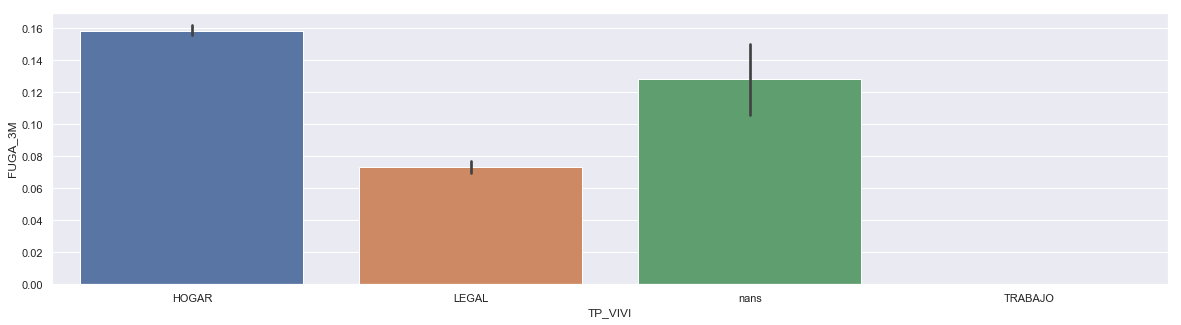

In [45]:
plt.figure(figsize=(20,5))
sns.barplot(x='TP_VIVI', y='FUGA_3M', data=df_stock_train.fillna('nans')) 
# Nulos tienen variacion. Trabajo no abandona.

In [46]:
df_stock_train[df_stock_train['TP_VIVI'] == 'TRABAJO'].FUGA_3M.value_counts(dropna=False).sort_index()

0    6
Name: FUGA_3M, dtype: int64

In [47]:
df_stock_train[df_stock_train['TP_VIVI'].isnull()].FUGA_3M.value_counts(dropna=False).sort_index()

0    808
1    119
Name: FUGA_3M, dtype: int64

# Analisis del tipo de persona

In [55]:
#Train
df_stock_train.TP_PERSONA.value_counts(dropna=False).sort_index()

A    11899
F    40250
J    21512
Name: TP_PERSONA, dtype: int64

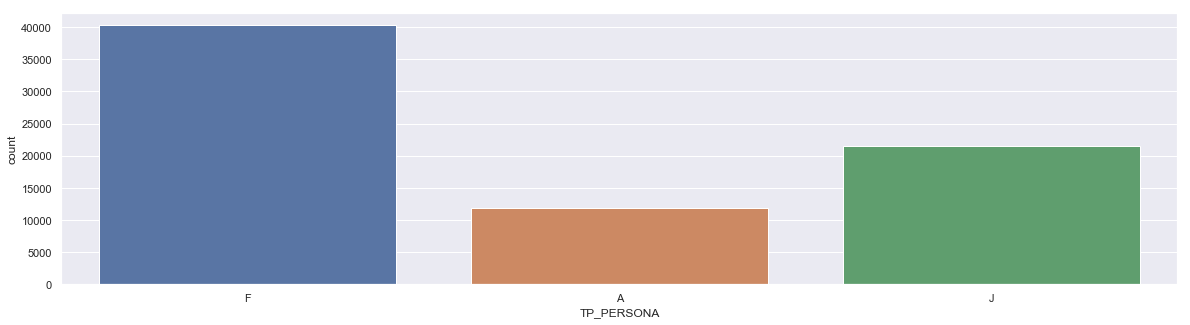

In [56]:
#Train
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'TP_PERSONA', data = df_stock_train)

In [53]:
#Test
df_stock_test.TP_PERSONA.value_counts(dropna=False).sort_index()

A     4249
F    14578
J     7511
Name: TP_PERSONA, dtype: int64

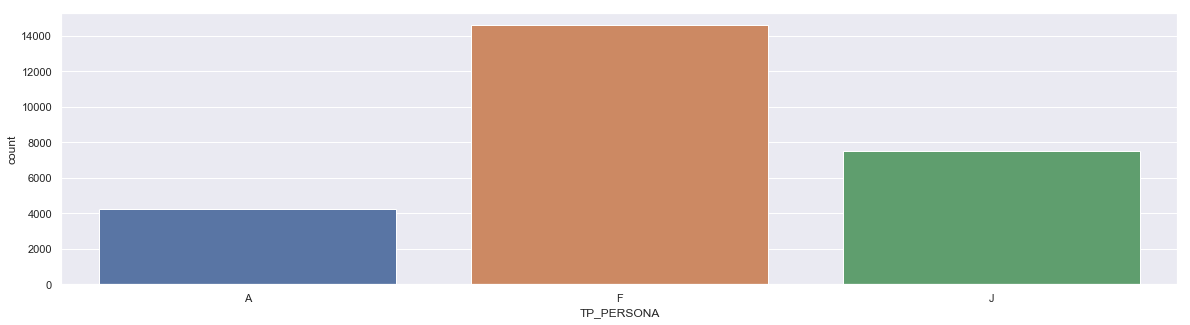

In [54]:
#Test
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'TP_PERSONA', data = df_stock_test)

### Misma distribucion entre train y test (me asusté pero en la x axis se ordena la A y la F al revés xd)

### Análisis contra el target

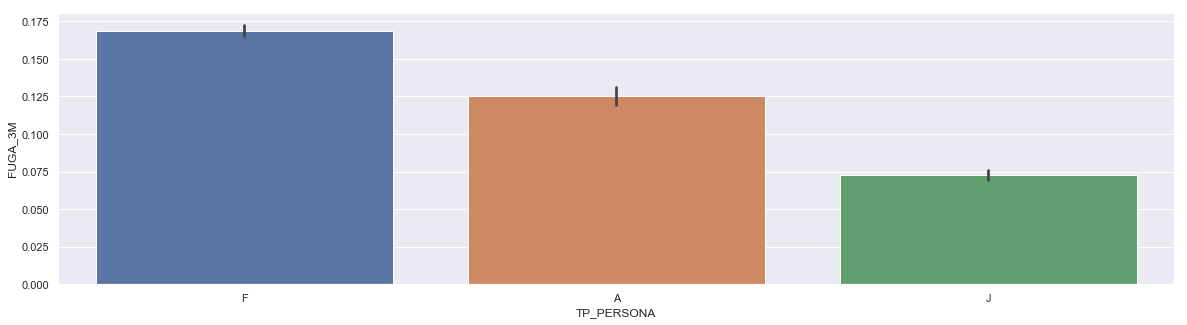

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x='TP_PERSONA', y='FUGA_3M', data=df_stock_train.fillna('nans')) 

F tiene más abandono en promedio, seguido del tipo persona A.

# Analisis del tipo de negocio

In [60]:
#Train
df_stock_train.TIPO_NEGOCIO.value_counts(dropna=False).sort_index()

PNN     52147
Pyme    21514
Name: TIPO_NEGOCIO, dtype: int64

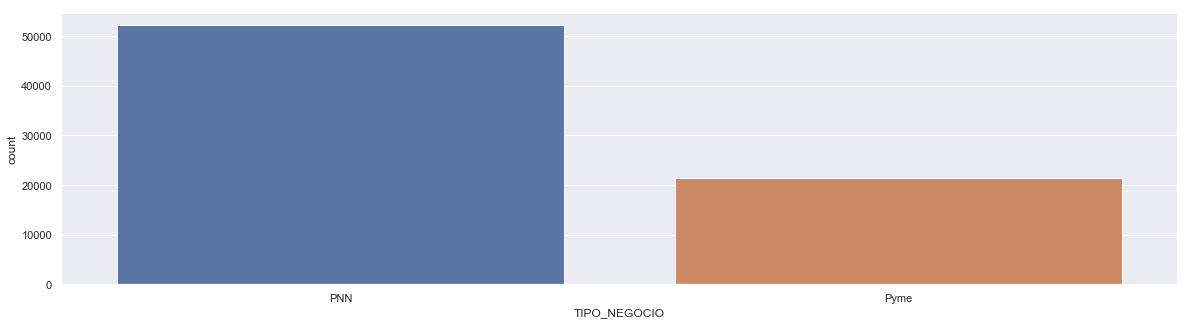

In [61]:
#Train
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'TIPO_NEGOCIO', data = df_stock_train)

In [62]:
#Test
df_stock_test.TIPO_NEGOCIO.value_counts(dropna=False).sort_index()

PNN     18827
Pyme     7511
Name: TIPO_NEGOCIO, dtype: int64

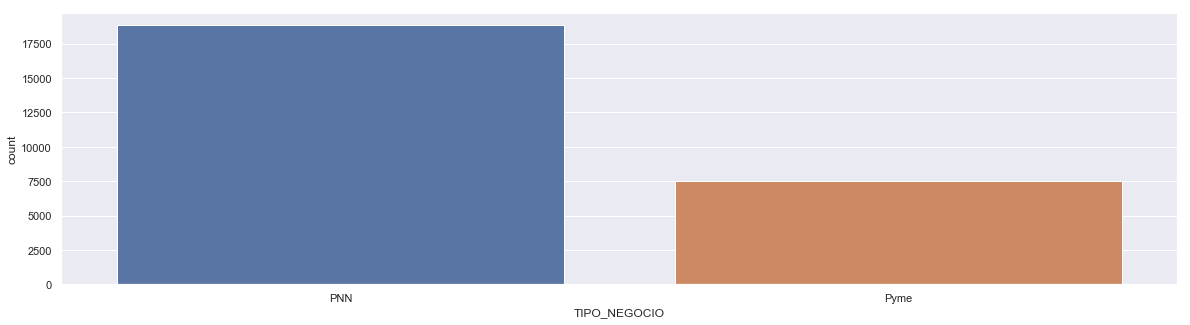

In [63]:
#Test
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'TIPO_NEGOCIO', data = df_stock_test)

### Same dist

### Análisis contra el target

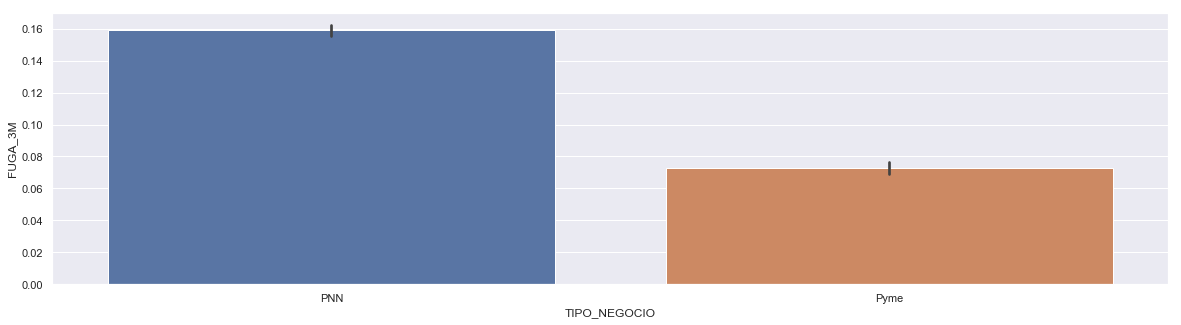

In [64]:
plt.figure(figsize=(20,5))
sns.barplot(x='TIPO_NEGOCIO', y='FUGA_3M', data=df_stock_train.fillna('nans')) 

#### PNN presenta mayor abandono en promedio

# Analisis de variables de la SBS

## CD_SBS_NORMAL

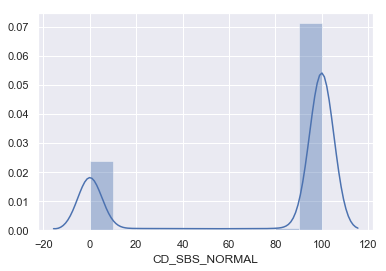

In [22]:
#Train
sns.distplot(df_stock_train['CD_SBS_NORMAL'], bins=10);

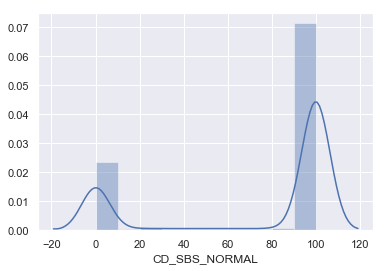

In [23]:
#Test
sns.distplot(df_stock_test['CD_SBS_NORMAL'], bins=10);

### Analisis con target

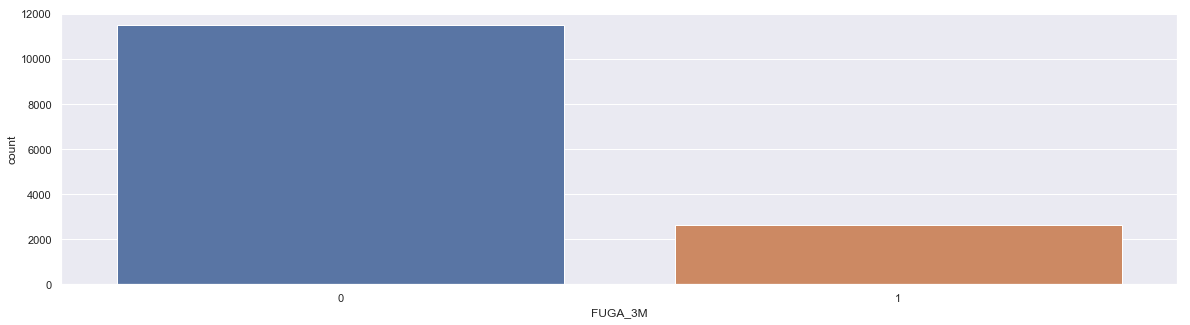

In [34]:
# Evaluaciones menores a 73 (mean)
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train[df_stock_train['CD_SBS_NORMAL'] < 73])

In [37]:
df_stock_train[df_stock_train['CD_SBS_NORMAL'] < 73].FUGA_3M.value_counts(normalize=True) # Mayor al promedio general en unos

0    0.812487
1    0.187513
Name: FUGA_3M, dtype: float64

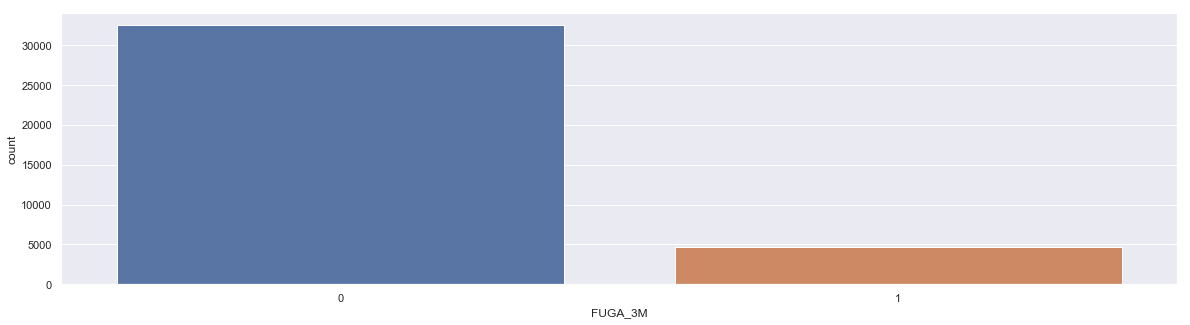

In [32]:
# Evaluaciones mayores o iguales a 73 (mean)
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train[df_stock_train['CD_SBS_NORMAL'] >= 73])

In [38]:
df_stock_train[df_stock_train['CD_SBS_NORMAL'] >= 73].FUGA_3M.value_counts(normalize=True) # Más bajo número de 1s que el prom

0    0.872801
1    0.127199
Name: FUGA_3M, dtype: float64

## CD_SBS_CPP

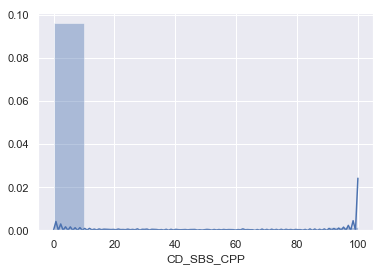

In [26]:
#Train
sns.distplot(df_stock_train['CD_SBS_CPP'], bins=10);

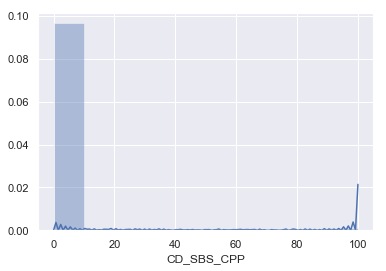

In [28]:
#Test
sns.distplot(df_stock_test['CD_SBS_CPP'], bins=10);

### Analisis con el target

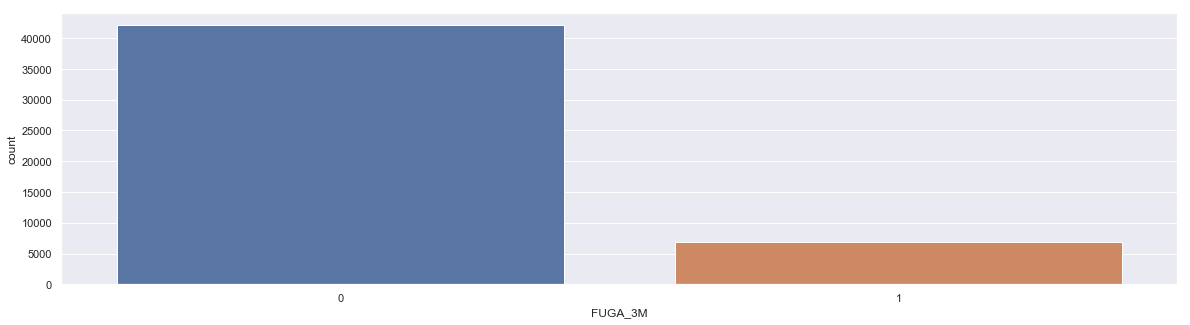

In [35]:
# Evaluaciones menores a 2 (mean)
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train[df_stock_train['CD_SBS_CPP'] < 2])

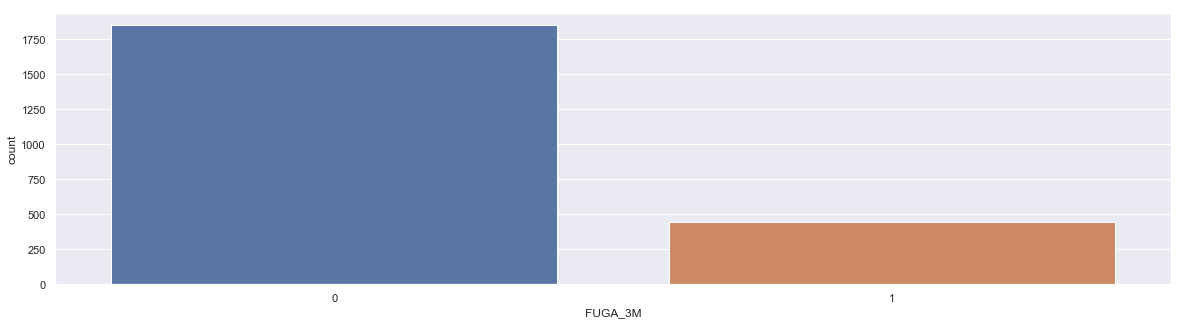

In [39]:
# Evaluaciones may o ig a 2 (mean)
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train[df_stock_train['CD_SBS_CPP'] >= 2])

In [41]:
df_stock_train[df_stock_train['CD_SBS_CPP'] < 2].FUGA_3M.value_counts(normalize=True)

0    0.858598
1    0.141402
Name: FUGA_3M, dtype: float64

In [42]:
df_stock_train[df_stock_train['CD_SBS_CPP'] >= 2].FUGA_3M.value_counts(normalize=True) # Contradictorio

0    0.804793
1    0.195207
Name: FUGA_3M, dtype: float64

### CD_SBS_DDP

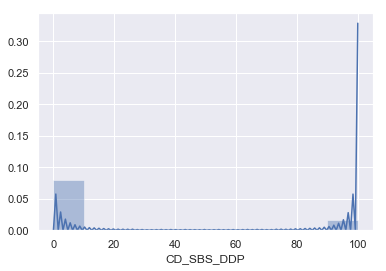

In [29]:
#Train
sns.distplot(df_stock_train['CD_SBS_DDP'], bins=10);

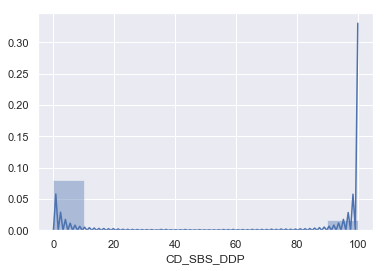

In [30]:
#Test
sns.distplot(df_stock_test['CD_SBS_DDP'], bins=10);

### Analisis con el target

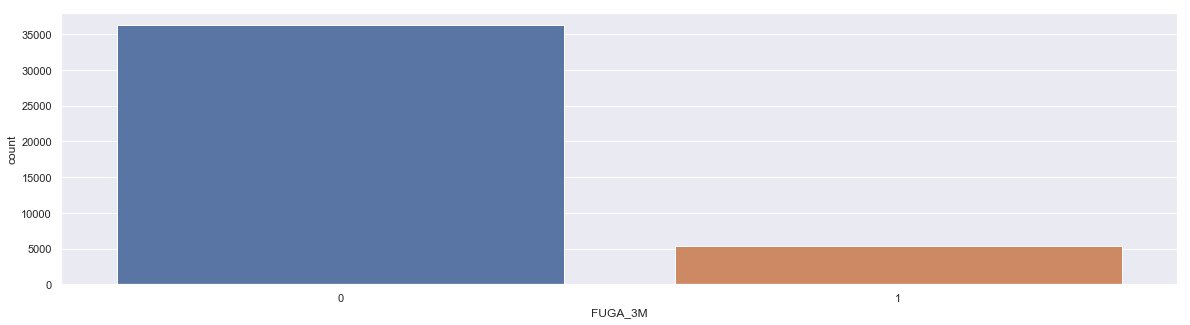

In [43]:
# Evaluaciones menores a 17 (mean)
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train[df_stock_train['CD_SBS_DDP'] < 17])

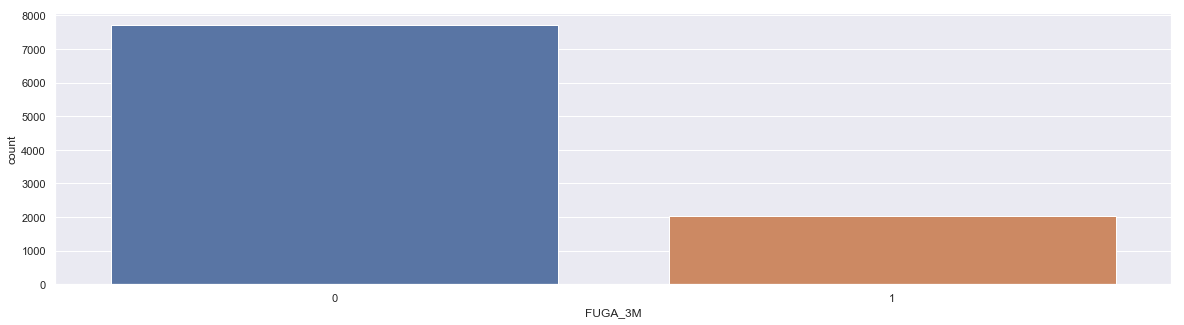

In [44]:
# Evaluaciones menores a 17 (mean)
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'FUGA_3M', data = df_stock_train[df_stock_train['CD_SBS_DDP'] >= 17])

In [45]:
df_stock_train[df_stock_train['CD_SBS_DDP'] < 17].FUGA_3M.value_counts(normalize=True)

0    0.87146
1    0.12854
Name: FUGA_3M, dtype: float64

In [46]:
df_stock_train[df_stock_train['CD_SBS_DDP'] >= 17].FUGA_3M.value_counts(normalize=True)

0    0.791025
1    0.208975
Name: FUGA_3M, dtype: float64

# Analizando las fechas y computando las diferencias dentre fecha y T0.
Aqui testearemos el preprocessing y crearemos otros dfs.

In [47]:
df_stock_train['FH_NACIMIENTO'].head(10)

0    2015-12-04 00:00:00
1    1970-11-11 00:00:00
2    1985-01-23 00:00:00
3    2008-01-01 00:00:00
4    2016-08-11 00:00:00
5    2015-04-14 00:00:00
6    2006-09-08 00:00:00
7    1988-05-16 00:00:00
8    1976-07-15 00:00:00
9    1951-10-06 00:00:00
Name: FH_NACIMIENTO, dtype: object

In [48]:
df_stock_train['FH_ALTA'].head(10)

0    2017-09-04 00:00:00
1    2007-08-14 00:00:00
2    2006-02-22 00:00:00
3    2008-06-12 00:00:00
4    2017-01-04 00:00:00
5    2015-05-20 00:00:00
6    2006-09-15 00:00:00
7    2011-01-18 00:00:00
8    2001-05-18 00:00:00
9    1996-11-19 00:00:00
Name: FH_ALTA, dtype: object

In [49]:
df_stock_train_p = df_stock_train.copy()
df_stock_test_p = df_stock_test.copy()

In [77]:
#Numero de meses hasta la fecha de nacimiento desde año 0 mes 0.
df_stock_train_p['months_NACIMIENTO'] = df_stock_train_p['FH_NACIMIENTO'].apply(lambda x: int(str(x).split('-')[0])*12 + int(str(x).split('-')[1]) if isinstance(x, str) else x)
df_stock_test_p['months_NACIMIENTO'] = df_stock_test_p['FH_NACIMIENTO'].apply(lambda x: int(str(x).split('-')[0])*12 + int(str(x).split('-')[1]) if isinstance(x, str) else x)

In [78]:
#Numero de meses basta fecha de alta desde año 0 mes 0
df_stock_train_p['months_ALTA'] = df_stock_train_p['FH_ALTA'].apply(lambda x: int(str(x).split('-')[0])*12 + int(str(x).split('-')[1]) if isinstance(x, str) else x)
df_stock_test_p['months_ALTA'] = df_stock_test_p['FH_ALTA'].apply(lambda x: int(str(x).split('-')[0])*12 + int(str(x).split('-')[1]) if isinstance(x, str) else x)

In [82]:
#Computando los meses del T0 desde el año 0 mes 0
df_stock_train_p['months_T0'] = df_stock_train_p['MES_T0'].apply(lambda x: int(str(x)[:4])*12 + int(str(x)[4:6]))
df_stock_test_p['months_T0'] = df_stock_test_p['MES_T0'].apply(lambda x: int(str(x)[:4])*12 + int(str(x)[4:6]))

In [85]:
#Computando columnas finales
df_stock_train_p['diff_months_T0_NACIMIENTO'] = df_stock_train_p['months_T0'] - df_stock_train_p['months_NACIMIENTO']
df_stock_test_p['diff_months_T0_NACIMIENTO'] = df_stock_test_p['months_T0'] - df_stock_test_p['months_NACIMIENTO']

df_stock_train_p['diff_months_T0_ALTA'] = df_stock_train_p['months_T0'] - df_stock_train_p['months_ALTA']
df_stock_test_p['diff_months_T0_ALTA'] = df_stock_test_p['months_T0'] - df_stock_test_p['months_ALTA']

# Analizando los meses desde el nacimiento y alta

In [89]:
df_stock_train_p[['diff_months_T0_NACIMIENTO','diff_months_T0_ALTA']].describe().T

,count,mean,std,min,25%,50%,75%,max
diff_months_T0_NACIMIENTO,72765.0,399.013688,240.986920,1.0,168.0,429.0,573.0,1426.0
diff_months_T0_ALTA,72852.0,89.592530,78.745967,1.0,26.0,68.0,130.0,611.0


In [90]:
df_stock_test_p[['diff_months_T0_NACIMIENTO','diff_months_T0_ALTA']].describe().T

,count,mean,std,min,25%,50%,75%,max
diff_months_T0_NACIMIENTO,26088.0,402.069879,239.109115,1.0,186.0,432.0,575.0,1429.0
diff_months_T0_ALTA,26094.0,91.207864,80.567834,1.0,26.0,71.0,132.0,613.0


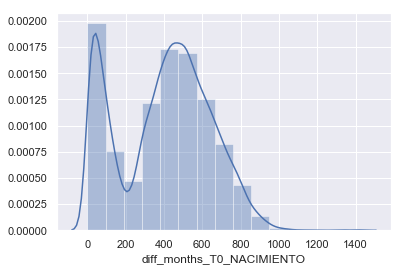

In [92]:
#Train NACIMIENTO
sns.distplot(df_stock_train_p['diff_months_T0_NACIMIENTO'], bins=15);

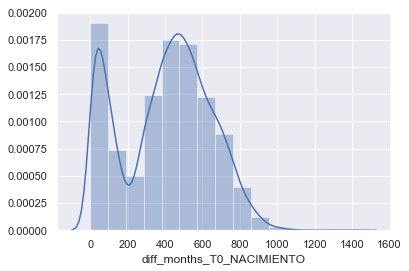

In [93]:
#Test NACIMIENTO
sns.distplot(df_stock_test_p['diff_months_T0_NACIMIENTO'], bins=15);

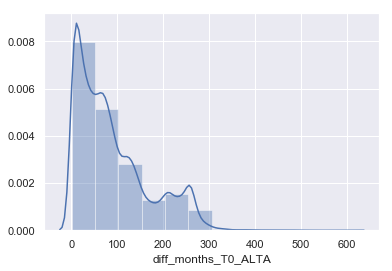

In [94]:
#Train ALTA
sns.distplot(df_stock_train_p['diff_months_T0_ALTA'], bins=12);

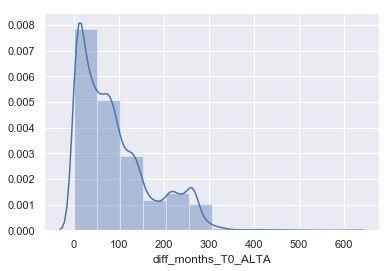

In [95]:
#Test ALTA
sns.distplot(df_stock_test_p['diff_months_T0_ALTA'], bins=12);